In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Prepping Data for Modeling 

In [11]:
df = pd.read_csv('data/stemlem.csv')

In [12]:
df['subreddit'] = df['subreddit'].map({'rant': 0, 'unpopularopinion' : 1})

In [13]:
# rant = 0, unpopularopinion = 1
# ~52% of the posts are from rant, ~48% are from unpop-opinions
df['subreddit'].value_counts(normalize=True)

0    0.520461
1    0.479539
Name: subreddit, dtype: float64

# NB Model-A 

In [10]:
#setting up my dependent and independent variables
X = df['all_text']
y = df['subreddit']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [26]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', BernoulliNB()),
])

In [27]:
pipe_params = {
    'cvec__max_features':[2_000, 3_000, 4_000, 5_000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[.9, .95],
    'cvec__ngram_range':[(1,1), (1,2)]
}

In [28]:
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params
                  ,cv=5)

In [29]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', BernoulliNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [30]:
gs.best_score_

0.7287166051975232

In [34]:
#these scores are relatively low, but close together meaning my variance isnt too high, but my bias is too low 
gs.score(X_test, y_test), gs.score(X_train, y_train)

(0.7213114754098361, 0.7435744172145846)

In [35]:
gs.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=5000, min_df=2,
                                 ngram_range=(1, 2), stop_words='english')),
                ('nb', BernoulliNB())])

In [36]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 5000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

# Logistic Regression Model-A 

In [40]:
X = df['all_text']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [41]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', LogisticRegression()),
])

pipe_params = {
    'cvec__max_features':[2_000, 3_000, 4_000, 5_000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[.9, .95],
    'cvec__ngram_range':[(1,1), (1,2)]
}

In [42]:
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params
                  ,cv=5)

In [43]:
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [2000, 3000, 4000, 5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [44]:
#this score is higher than the NB model
gs.best_score_

0.7791819519450893

In [45]:
#the cv best estimators are the same as the NB model, with the excetion of no ngram_range
gs.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=5000, min_df=2,
                                 stop_words='english')),
                ('nb', LogisticRegression())])

In [46]:
#the model is incredibly overfit, i believe this is due high of variance in the model,
#maybe lowering max_features will changes this

gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.9588421142515584, 0.7733094262295082)

# Logistic Regression Model-B

This model will be the same as the previous, but with differnet  list of max_features


In [47]:
X = df['all_text']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [53]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', LogisticRegression()),
])

pipe_params = {
    'cvec__max_features':[500, 1_000, 2000],
    'cvec__min_df':[2,3],
    'cvec__max_df':[.9, .95],
    'cvec__ngram_range':[(1,1), (1,2)]
}

In [54]:
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params
                  ,cv=5)

In [55]:
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb', LogisticRegression())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [500, 1000, 2000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [56]:
gs.best_score_

0.7784989938596463

In [57]:
#max_features is 500
gs.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=500, min_df=2,
                                 ngram_range=(1, 2), stop_words='english')),
                ('nb', LogisticRegression())])

In [60]:
#the train score is significantly lower than the previous model, but the test score is about the same
# and closer to the train score, inidicating a decent balance between bias and variance
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8071898215353087, 0.7753586065573771)

# Logistic Regression Model-C  

In [61]:
X = df['all_text']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [78]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', LogisticRegression(solver='saga')),
])

pipe_params = {
    'cvec__max_features':[1000],
    'cvec__min_df':[2],
    'cvec__max_df':[.9],
    'cvec__ngram_range':[(1,2)],
    'nb__C':[1,10],
    'nb__penalty':['l1', 'l2']
}

In [79]:
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params
                  ,cv=5)

In [80]:
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'cvec__max_df': [0.9], 'cvec__max_features': [1000],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 2)],
                         'nb__C': [1, 10], 'nb__penalty': ['l1', 'l2']})

In [83]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 1000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'nb__C': 1,
 'nb__penalty': 'l1'}

In [81]:
gs.best_score_

0.7851589832970861

In [82]:
gs.score(X_test, y_test)

0.779969262295082

# Logistic Regression Model-D 

In [42]:
X = df['lem']
y = df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [43]:
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words='english')),
    ('nb', LogisticRegression(solver='saga')),
])

pipe_params = {
    'cvec__max_features':[2500],
    'cvec__min_df':[2],
    'cvec__max_df':[.9],
    'cvec__ngram_range':[(1,2)],
    'nb__C':[1],
    'nb__penalty':['l1']
}

In [44]:
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params
                  ,cv=5)

In [45]:
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which mean

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words='english')),
                                       ('nb',
                                        LogisticRegression(solver='saga'))]),
             param_grid={'cvec__max_df': [0.9], 'cvec__max_features': [2500],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 2)],
                         'nb__C': [1], 'nb__penalty': ['l1']})

In [67]:
gs.best_score_

0.7923324487462517

In [115]:
feats = gs.best_estimator_['cvec'].get_feature_names()

In [135]:
gs.best_estimator_['nb'].coef_[0]

array([-0.03502057, -0.02275051,  0.02867886, ...,  0.11040358,
       -0.02169208, -0.06894522])

In [120]:
pro = pd.DataFrame(feats)

In [122]:
pro.columns = ['feature']

In [136]:
pro['coefs'] = gs.best_estimator_['nb'].coef_[0]

In [141]:
pro.sort_values(by='coefs').head(10)

,feature,coefs
1765,rant,-0.869537
898,fuck,-0.777752
907,fucking,-0.638881
2286,trump,-0.542415
2341,vaccine,-0.382684
1981,sick,-0.293315
522,damn,-0.293171
2244,told,-0.283372
2241,today,-0.276898
125,apparently,-0.275292


In [142]:
pro.sort_values(by='coefs').tail(10)

,feature,coefs
972,gross,0.244574
1691,prefer,0.262996
499,cringe,0.288088
1545,opinion,0.316960
2153,taste,0.337767
1972,shouldnt,0.344966
1556,overrated,0.354782
224,better,0.380053
221,best,0.404455
2324,unpopular,0.470646


In [19]:
gs.score(X_train, y_train), gs.score(X_test, y_test)

(0.8324652036546837, 0.7966188524590164)

In [24]:
preds = gs.predict(X_test)
cm = confusion_matrix(y_test, preds)

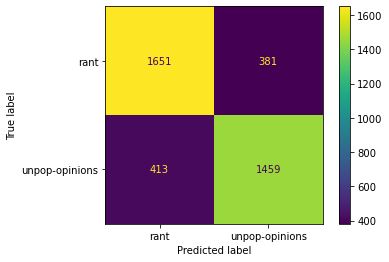

In [29]:
ConfusionMatrixDisplay(cm, display_labels=['rant', 'unpop-opinions']).plot();